In [2]:
# dependencies
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
# Make a reference to the csv file
bio_csv = Path("Model Data/Olympic_Athlete_bio_history.csv")

# Import the csv file as a DataFrame
bio_df = pd.read_csv(bio_csv, encoding="utf-8", parse_dates = True)

# Check the special characters imported correctly
bio_df.head()

,athlete_id,name,sex,born,height,weight,country,country_noc
0,65649,Ivanka Bonova,Female,4-Apr-49,166.0,55,Bulgaria,BUL
1,112510,Nataliya Uryadova,Female,15-Mar-77,184.0,70,Russian Federation,RUS
2,114973,Essa Ismail Rashed,Male,14-Dec-86,165.0,55,Qatar,QAT
3,30359,Péter Boros,Male,12-Jan-08,NaN,NaN,Hungary,HUN
4,50557,Rudolf Piowatý,Male,28-Apr-00,NaN,NaN,Czechoslovakia,TCH


In [4]:
bio_df = bio_df.dropna()
bio_df

,athlete_id,name,sex,born,height,weight,country,country_noc
0,65649,Ivanka Bonova,Female,4-Apr-49,166.0,55,Bulgaria,BUL
1,112510,Nataliya Uryadova,Female,15-Mar-77,184.0,70,Russian Federation,RUS
2,114973,Essa Ismail Rashed,Male,14-Dec-86,165.0,55,Qatar,QAT
6,133041,Vincent Riendeau,Male,13-Dec-96,178.0,68,Canada,CAN
7,110425,Tanja Morel,Female,4-Oct-75,164.0,58,Switzerland,SUI
...,...,...,...,...,...,...,...,...
155854,26283,Muhaisin Al-Jamaan,Male,6-Apr-66,175.0,62,Kingdom of Saudi Arabia,KSA
155856,23748,Todd Makler,Male,8-Jan-46,183.0,75,United States,USA
155857,58581,Géza Hollósi,Male,2-May-38,175.0,79,Hungary,HUN
155859,69900,Alexander Thieme,Male,13-Jan-54,187.0,84,East Germany,GDR


In [5]:
bio_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105019 entries, 0 to 155860
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   athlete_id   105019 non-null  int64  
 1   name         105019 non-null  object 
 2   sex          105019 non-null  object 
 3   born         105019 non-null  object 
 4   height       105019 non-null  float64
 5   weight       105019 non-null  object 
 6   country      105019 non-null  object 
 7   country_noc  105019 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 7.2+ MB


In [6]:
# changing born column to datetime and had to use coerce to force it to change.
bio_df['born']=pd.to_datetime(bio_df['born'], errors = 'coerce')
bio_df.info()

C:\Users\Owner\AppData\Local\Temp\ipykernel_11588\453588914.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bio_df['born']=pd.to_datetime(bio_df['born'], errors = 'coerce')


<class 'pandas.core.frame.DataFrame'>
Index: 105019 entries, 0 to 155860
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   athlete_id   105019 non-null  int64         
 1   name         105019 non-null  object        
 2   sex          105019 non-null  object        
 3   born         104998 non-null  datetime64[ns]
 4   height       105019 non-null  float64       
 5   weight       105019 non-null  object        
 6   country      105019 non-null  object        
 7   country_noc  105019 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 7.2+ MB


In [7]:
#confirming born column updated to correct format.
bio_df

,athlete_id,name,sex,born,height,weight,country,country_noc
0,65649,Ivanka Bonova,Female,2049-04-04,166.0,55,Bulgaria,BUL
1,112510,Nataliya Uryadova,Female,1977-03-15,184.0,70,Russian Federation,RUS
2,114973,Essa Ismail Rashed,Male,1986-12-14,165.0,55,Qatar,QAT
6,133041,Vincent Riendeau,Male,1996-12-13,178.0,68,Canada,CAN
7,110425,Tanja Morel,Female,1975-10-04,164.0,58,Switzerland,SUI
...,...,...,...,...,...,...,...,...
155854,26283,Muhaisin Al-Jamaan,Male,2066-04-06,175.0,62,Kingdom of Saudi Arabia,KSA
155856,23748,Todd Makler,Male,2046-01-08,183.0,75,United States,USA
155857,58581,Géza Hollósi,Male,2038-05-02,175.0,79,Hungary,HUN
155859,69900,Alexander Thieme,Male,2054-01-13,187.0,84,East Germany,GDR


In [33]:
# Making year column
bio_df['Birth Year'] = bio_df['born'].dt.year
bio_df['Birth Month'] = bio_df['born'].dt.month
bio_df

,athlete_id,name,sex,born,height,weight,country,country_noc,Birth Year,Birth Month
0,65649,Ivanka Bonova,Female,2049-04-04,166.0,55,Bulgaria,BUL,2049.0,4.0
1,112510,Nataliya Uryadova,Female,1977-03-15,184.0,70,Russian Federation,RUS,1977.0,3.0
2,114973,Essa Ismail Rashed,Male,1986-12-14,165.0,55,Qatar,QAT,1986.0,12.0
6,133041,Vincent Riendeau,Male,1996-12-13,178.0,68,Canada,CAN,1996.0,12.0
7,110425,Tanja Morel,Female,1975-10-04,164.0,58,Switzerland,SUI,1975.0,10.0
...,...,...,...,...,...,...,...,...,...,...
155854,26283,Muhaisin Al-Jamaan,Male,2066-04-06,175.0,62,Kingdom of Saudi Arabia,KSA,2066.0,4.0
155856,23748,Todd Makler,Male,2046-01-08,183.0,75,United States,USA,2046.0,1.0
155857,58581,Géza Hollósi,Male,2038-05-02,175.0,79,Hungary,HUN,2038.0,5.0
155859,69900,Alexander Thieme,Male,2054-01-13,187.0,84,East Germany,GDR,2054.0,1.0


In [66]:
bio_df[bio_df['weight']=="90-121"]

,athlete_id,name,sex,born,height,weight,country,country_noc,Birth Year,Birth Month
1510,57018,Norb Schemansky,Male,2024-05-30,181.0,90-121,United States,USA,2024.0,5.0


In [64]:
bio_df = bio_df.drop([1265,11972,30263,52380,92562,119796,128656,136051], axis=0)


In [65]:
# recasting name column
bio_df['name']=bio_df['name'].astype('string')
bio_df['weight']=bio_df['weight'].astype('float')

ValueError: could not convert string to float: '90-121'

In [10]:
bio_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105019 entries, 0 to 155860
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   athlete_id   105019 non-null  int64         
 1   name         105019 non-null  string        
 2   sex          105019 non-null  object        
 3   born         104998 non-null  datetime64[ns]
 4   height       105019 non-null  float64       
 5   weight       105019 non-null  object        
 6   country      105019 non-null  object        
 7   country_noc  105019 non-null  object        
 8   Birth Year   104998 non-null  float64       
 9   Birth Month  104998 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4), string(1)
memory usage: 8.8+ MB


In [11]:
# since pandas couldn't tell what 49 meant in original column it put it as 2049..formula below puts date into correct year.
bio_df['Birth Year'] = np.where(bio_df['Birth Year'] > 2010, bio_df['Birth Year']-100, bio_df['Birth Year'])
bio_df.sample(25)

,athlete_id,name,sex,born,height,weight,country,country_noc,Birth Year,Birth Month
60193,4429,Teboho Mathibeli,Male,2070-12-02,150.0,51,Lesotho,LES,1970.0,12.0
42965,8031,Viliamu Lesiva,Male,2065-05-15,173.0,75,Samoa,SAM,1965.0,5.0
67074,85576,Jorma Etelälahti,Male,2051-11-17,169.0,62-63,Finland,FIN,1951.0,11.0
113836,40762,Dick Lyon,Male,2039-09-07,191.0,84,United States,USA,1939.0,9.0
65527,23038,David Cocker,Male,2055-04-27,180.0,75,New Zealand,NZL,1955.0,4.0
119446,78834,Larry Myricks,Male,2056-03-10,186.0,82,United States,USA,1956.0,3.0
19480,58845,Seán O'Connor,Male,2037-07-26,156.0,52,Ireland,IRL,1937.0,7.0
56017,73398,Eston Kaonga,Male,2048-02-22,175.0,72,Malawi,MAW,1948.0,2.0
1620,136025,Philip Stenmalm,Male,1992-03-03,200.0,103,Sweden,SWE,1992.0,3.0
53650,472,Claude Franclet,Male,2064-06-23,176.0,65,France,FRA,1964.0,6.0


In [12]:
# Make a reference to the medals csv file
medals_csv = Path('Model Data/Olympic_Athlete_Event_results.csv')

# Import the csv file as a DataFrame
medals_df = pd.read_csv(medals_csv, encoding = "utf-8")

# Check the special characters imported correctly
medals_df.head()

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,NaN,False
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,NaN,False
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,NaN,False
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,NaN,False
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,NaN,False


## Prepping Data to begin mapping if athletes born in specific months medal more.

In [13]:
birthday_medals_df = pd.merge(bio_df,  
                      medals_df,  
                      on ='athlete_id', 
                      how ='left')
birthday_medals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229330 entries, 0 to 229329
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   athlete_id     229330 non-null  int64         
 1   name           229330 non-null  string        
 2   sex            229330 non-null  object        
 3   born           229307 non-null  datetime64[ns]
 4   height         229330 non-null  float64       
 5   weight         229330 non-null  object        
 6   country        229330 non-null  object        
 7   country_noc_x  229330 non-null  object        
 8   Birth Year     229307 non-null  float64       
 9   Birth Month    229307 non-null  float64       
 10  edition        229330 non-null  object        
 11  edition_id     229330 non-null  int64         
 12  country_noc_y  229330 non-null  object        
 13  sport          229330 non-null  object        
 14  event          229330 non-null  object        
 15  

In [28]:
birthday_medals_df['medal']=birthday_medals_df['medal'].astype('string')
birthday_medals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229330 entries, 0 to 229329
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   athlete_id   229330 non-null  int64         
 1   name         229330 non-null  string        
 2   sex          229330 non-null  object        
 3   born         229307 non-null  datetime64[ns]
 4   height       229330 non-null  float64       
 5   weight       229330 non-null  object        
 6   country      229330 non-null  object        
 7   Birth Year   229307 non-null  float64       
 8   Birth Month  229307 non-null  float64       
 9   edition      229330 non-null  object        
 10  edition_id   229330 non-null  int64         
 11  sport        229330 non-null  object        
 12  event        229330 non-null  object        
 13  pos          229330 non-null  object        
 14  medal        229330 non-null  string        
 15  isTeamSport  229330 non-null  bool

In [15]:
birthday_medals_df = birthday_medals_df.drop(["country_noc_x","country_noc_y","athlete", "result_id" ], axis=1)
birthday_medals_df.head()

,athlete_id,name,sex,born,height,weight,country,Birth Year,Birth Month,edition,edition_id,sport,event,pos,medal,isTeamSport
0,65649,Ivanka Bonova,Female,2049-04-04,166.0,55,Bulgaria,1949.0,4.0,1976 Summer Olympics,19,Athletics,"4 × 400 metres Relay, Women",5 h2 r1/2,<NA>,True
1,65649,Ivanka Bonova,Female,2049-04-04,166.0,55,Bulgaria,1949.0,4.0,1980 Summer Olympics,20,Athletics,"4 × 400 metres Relay, Women",AC r2/2,<NA>,True
2,112510,Nataliya Uryadova,Female,1977-03-15,184.0,70,Russian Federation,1977.0,3.0,2008 Summer Olympics,53,Beach Volleyball,"Beach Volleyball, Women",19,<NA>,True
3,114973,Essa Ismail Rashed,Male,1986-12-14,165.0,55,Qatar,1986.0,12.0,2008 Summer Olympics,53,Athletics,"10,000 metres, Men",20,<NA>,False
4,133041,Vincent Riendeau,Male,1996-12-13,178.0,68,Canada,1996.0,12.0,2016 Summer Olympics,59,Diving,"Platform, Men",14 r2/3,<NA>,False


In [16]:
birthday_medals_df['medal'] = birthday_medals_df['medal'].fillna("No")
birthday_medals_df

,athlete_id,name,sex,born,height,weight,country,Birth Year,Birth Month,edition,edition_id,sport,event,pos,medal,isTeamSport
0,65649,Ivanka Bonova,Female,2049-04-04,166.0,55,Bulgaria,1949.0,4.0,1976 Summer Olympics,19,Athletics,"4 × 400 metres Relay, Women",5 h2 r1/2,No,True
1,65649,Ivanka Bonova,Female,2049-04-04,166.0,55,Bulgaria,1949.0,4.0,1980 Summer Olympics,20,Athletics,"4 × 400 metres Relay, Women",AC r2/2,No,True
2,112510,Nataliya Uryadova,Female,1977-03-15,184.0,70,Russian Federation,1977.0,3.0,2008 Summer Olympics,53,Beach Volleyball,"Beach Volleyball, Women",19,No,True
3,114973,Essa Ismail Rashed,Male,1986-12-14,165.0,55,Qatar,1986.0,12.0,2008 Summer Olympics,53,Athletics,"10,000 metres, Men",20,No,False
4,133041,Vincent Riendeau,Male,1996-12-13,178.0,68,Canada,1996.0,12.0,2016 Summer Olympics,59,Diving,"Platform, Men",14 r2/3,No,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229325,74003,Sunday Bada,Male,2069-06-22,188.0,79,Nigeria,1969.0,6.0,1992 Summer Olympics,23,Athletics,"4 × 400 metres Relay, Men",5,No,True
229326,74003,Sunday Bada,Male,2069-06-22,188.0,79,Nigeria,1969.0,6.0,1996 Summer Olympics,24,Athletics,"400 metres, Men",5 h2 r3/4,No,False
229327,74003,Sunday Bada,Male,2069-06-22,188.0,79,Nigeria,1969.0,6.0,1996 Summer Olympics,24,Athletics,"4 × 400 metres Relay, Men",AC h2 r2/3,No,True
229328,74003,Sunday Bada,Male,2069-06-22,188.0,79,Nigeria,1969.0,6.0,2000 Summer Olympics,25,Athletics,"400 metres, Men",7 h4 r2/4,No,False


In [17]:
# filtering just Gold medals to plot
Gold_df = birthday_medals_df[birthday_medals_df['medal']=="Gold"]

gold_df = Gold_df.groupby('Birth Month').count()
gold_df = gold_df[['medal']]
gold_df = gold_df.reset_index()
gold_df

# filtering just Silver medals to plot
Silver_df = birthday_medals_df[birthday_medals_df['medal']=="Silver"]

silver_df = Silver_df.groupby('Birth Month').count()
silver_df = silver_df[['medal']]
silver_df = silver_df.reset_index()

# filtering just Bronze medals to plot
Bronze_df = birthday_medals_df[birthday_medals_df['medal']=="Bronze"]

bronze_df = Bronze_df.groupby('Birth Month').count()
bronze_df = bronze_df[['medal']]
bronze_df = bronze_df.reset_index()

In [18]:
birthday_medals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229330 entries, 0 to 229329
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   athlete_id   229330 non-null  int64         
 1   name         229330 non-null  string        
 2   sex          229330 non-null  object        
 3   born         229307 non-null  datetime64[ns]
 4   height       229330 non-null  float64       
 5   weight       229330 non-null  object        
 6   country      229330 non-null  object        
 7   Birth Year   229307 non-null  float64       
 8   Birth Month  229307 non-null  float64       
 9   edition      229330 non-null  object        
 10  edition_id   229330 non-null  int64         
 11  sport        229330 non-null  object        
 12  event        229330 non-null  object        
 13  pos          229330 non-null  object        
 14  medal        229330 non-null  string        
 15  isTeamSport  229330 non-null  bool

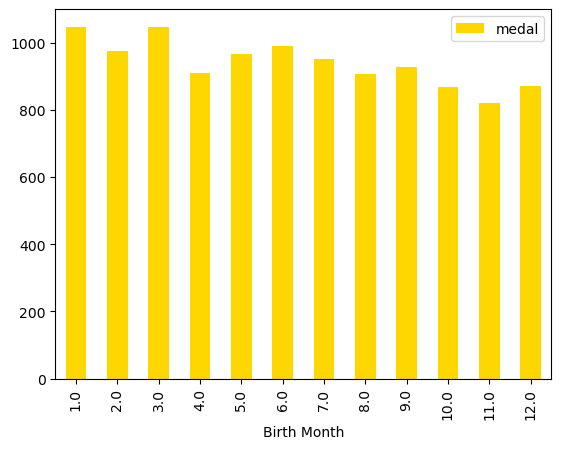

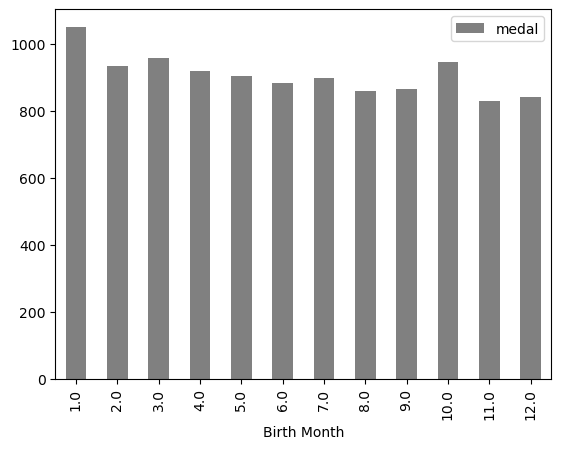

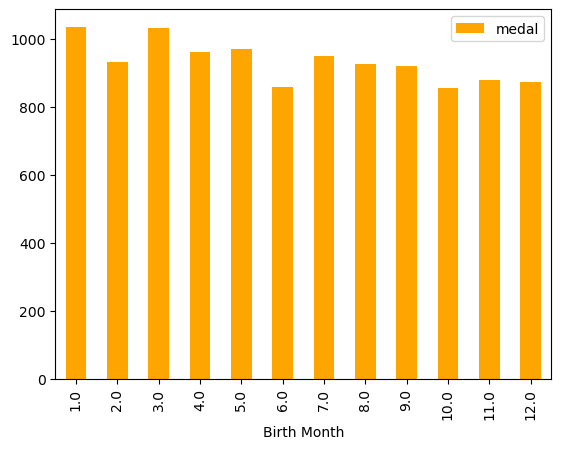

In [19]:

gold_df.plot(kind='bar',
        x='Birth Month',
        y='medal',
        color='Gold')
plt.show()

silver_df.plot(kind='bar',
        x='Birth Month',
        y='medal',
        color='Gray')
plt.show()

bronze_df.plot(kind='bar',
        x='Birth Month',
        y='medal',
        color='Orange',
        legend = "Bronze"
)
plt.show()

## Plotting if birth year changed over the years.

In [20]:
birth_hght_df = bio_df.groupby('Birth Year').mean('height')
birth_hght_df = birth_hght_df.reset_index()
birth_hght_df

,Birth Year,athlete_id,height,Birth Month
0,1850.0,47310.000000,165.000000,5.000000
1,1853.0,79920.000000,170.000000,10.000000
2,1864.0,29486.500000,183.500000,4.000000
3,1865.0,920316.000000,168.000000,3.000000
4,1867.0,31415.500000,179.500000,4.500000
...,...,...,...,...
140,2006.0,68778.019048,176.752381,6.876190
141,2007.0,95646.933333,174.900000,6.350000
142,2008.0,97407.327869,177.295082,6.631148
143,2009.0,106414.703390,175.915254,7.008475


In [21]:
birth_hght_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Birth Year   145 non-null    float64
 1   athlete_id   145 non-null    float64
 2   height       145 non-null    float64
 3   Birth Month  145 non-null    float64
dtypes: float64(4)
memory usage: 4.7 KB


In [23]:
birth_wght_df = bio_df.groupby('Birth Year').mean('weight')
birth_wght_df = birth_wght_df.reset_index()
birth_wght_df

,Birth Year,athlete_id,height,Birth Month
0,1850.0,47310.000000,165.000000,5.000000
1,1853.0,79920.000000,170.000000,10.000000
2,1864.0,29486.500000,183.500000,4.000000
3,1865.0,920316.000000,168.000000,3.000000
4,1867.0,31415.500000,179.500000,4.500000
...,...,...,...,...
140,2006.0,68778.019048,176.752381,6.876190
141,2007.0,95646.933333,174.900000,6.350000
142,2008.0,97407.327869,177.295082,6.631148
143,2009.0,106414.703390,175.915254,7.008475


In [22]:
# Creating HVPlot of average height per birth year.  Data from the year 1907 must not be reliable as the average height would make the athletes that year
# at 6 ft 8 inches.
import hvplot.pandas
birth_hght_df.hvplot.line(
    x="Birth Year",
    y="height",
    title = "Average Height (CM) by Birth Year"
)


:Curve   [Birth Year]   (height)